# Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# 1. Data

# 1.1. Understanding data

In [2]:
# Importing past data and checking data types
past = pd.read_csv(r"C:\Users\joaoa\Desktop\Ironhack\Labs\Machine_Learning_Bootcamp_Competitio\Past_data.csv")
print(past.dtypes)
past

Index                   int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
dtype: object


,Index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,511306,52,2,1/1/2013,0,0,0,a,1,0
1,150763,677,2,1/1/2013,0,0,0,a,1,0
2,633749,348,2,1/1/2013,0,0,0,a,1,0
3,106460,966,2,1/1/2013,0,0,0,a,1,0
4,278363,750,2,1/1/2013,0,0,0,a,1,0
...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,4/22/2015,416,1,0,0,0,3856
570550,373333,715,3,4/22/2015,613,1,0,0,0,5154
570551,586351,93,3,4/22/2015,553,1,0,0,0,4923
570552,672462,845,3,4/22/2015,302,1,0,0,0,3974


In [3]:
# Importing future data and checking data types
future = pd.read_csv(r"C:\Users\joaoa\Desktop\Ironhack\Labs\Machine_Learning_Bootcamp_Competition\Future_data_without_label.csv")
print(future.dtypes)
future

Index                   int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
dtype: object


,Index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,617699,761,3,4/22/2015,955,1,0,0,0
1,522235,238,3,4/22/2015,1025,1,0,0,0
2,321177,198,3,4/22/2015,203,1,0,0,0
3,395430,606,3,4/22/2015,585,1,0,0,0
4,488260,382,3,4/22/2015,555,1,0,0,0
...,...,...,...,...,...,...,...,...,...
70281,369531,58,5,7/31/2015,603,1,1,0,0
70282,161452,241,5,7/31/2015,763,1,1,0,1
70283,242869,293,5,7/31/2015,878,1,1,0,1
70284,480480,14,5,7/31/2015,710,1,1,0,1


In [4]:
# Standardizing header names
cols_past = []
for i in range(len(past.columns)):
    cols_past.append(past.columns[i].lower().replace(" ","_"))
past.columns = cols_past

cols_future = []
for i in range(len(future.columns)):
    cols_future.append(future.columns[i].lower().replace(" ","_"))
future.columns = cols_future

In [5]:
# Correcting "state_holiday" data type
past["state_holiday"] = past["state_holiday"].astype(str)
future["state_holiday"] = future["state_holiday"].astype(str)

# Spliting year, month and day
past['date'] = pd.to_datetime(past['date'])
past["year"] = past["date"].dt.year
past["month"] = past["date"].dt.month
past["day"] = past["date"].dt.day
past = past.drop("date", axis = 1)
print("Past data types:\n", past.dtypes)

print("--------------------------")

future['date'] = pd.to_datetime(future['date'])
future["year"] = future["date"].dt.year
future["month"] = future["date"].dt.month
future["day"] = future["date"].dt.day
future = future.drop("date", axis = 1)
print("Future data types:\n", future.dtypes)

Past data types:
 index                   int64
store_id                int64
day_of_week             int64
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
year                    int64
month                   int64
day                     int64
dtype: object
--------------------------
Future data types:
 index                   int64
store_id                int64
day_of_week             int64
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
year                    int64
month                   int64
day                     int64
dtype: object


In [6]:
# Checking nulls
print("Past nulls:\n", past.isna().sum())
print("--------------------------")
print("Future nulls:\n", future.isna().sum())

Past nulls:
 index                  0
store_id               0
day_of_week            0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
year                   0
month                  0
day                    0
dtype: int64
--------------------------
Future nulls:
 index                  0
store_id               0
day_of_week            0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
year                   0
month                  0
day                    0
dtype: int64


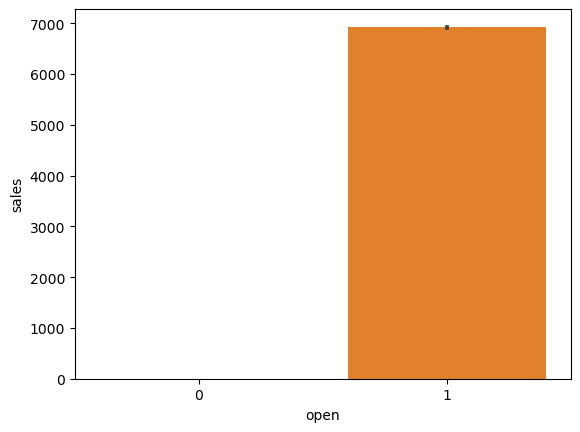

In [7]:
# Checking "open" vs "sales"
sns.barplot(x = past["open"], y = past["sales"], data = past, estimator = "mean")
plt.show()

In [8]:
# Comfirming that there aren't sales when the store is not open
past[(past["open"] == 0) & (past["sales"] != 0)]

,index,store_id,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day


In [9]:
# Confirming that there aren't sales when the number of customers is zero
past[(past["nb_customers_on_day"] == 0) & (past["sales"] != 0)]

,index,store_id,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day


In [10]:
# Updating the Past data with rows that have consumers
# This is the data that we will train and implement the model, because we are sure about the sales in the rows that have zero customers
df_past = past[(past["open"] != 0) & (past["nb_customers_on_day"] != 0)]
df_past = df_past.drop(["index", "open"], axis = 1)
df_past = df_past.reset_index(drop = True)
df_past

,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,year,month,day
0,676,2,777,0,a,1,3821,2013,1,1
1,274,2,729,0,a,1,3102,2013,1,1
2,423,2,1751,0,a,1,9643,2013,1,1
3,259,2,1444,0,a,1,6851,2013,1,1
4,769,2,1248,0,a,1,5035,2013,1,1
...,...,...,...,...,...,...,...,...,...,...
473775,126,3,416,0,0,0,3856,2015,4,22
473776,715,3,613,0,0,0,5154,2015,4,22
473777,93,3,553,0,0,0,4923,2015,4,22
473778,845,3,302,0,0,0,3974,2015,4,22


In [11]:
# For that reason we can predict 12140 rows correctly (17.3% of total rows)
# Therefore we only need to predict the sales from 58146 rows
df_future = future[(future["open"] != 0) & (future["nb_customers_on_day"] != 0)]
df_future = df_future.drop(["index", "open"], axis = 1)
df_future = df_future.reset_index(drop = True)
df_future

,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,year,month,day
0,761,3,955,0,0,0,2015,4,22
1,238,3,1025,0,0,0,2015,4,22
2,198,3,203,0,0,0,2015,4,22
3,606,3,585,0,0,0,2015,4,22
4,382,3,555,0,0,0,2015,4,22
...,...,...,...,...,...,...,...,...,...
58141,58,5,603,1,0,0,2015,7,31
58142,241,5,763,1,0,1,2015,7,31
58143,293,5,878,1,0,1,2015,7,31
58144,14,5,710,1,0,1,2015,7,31


In [12]:
# Checking unique values in the independent variables from the Past data
print("day_of_week:", df_past["day_of_week"].unique())
print("promotion:", df_past["promotion"].unique())
print("state_holiday:", df_past["state_holiday"].unique())
print("school_holiday:", df_past["school_holiday"].unique())
print("year:", df_past["year"].unique())
print("month:", df_past["month"].unique())
print("day:", df_past["day"].unique())

day_of_week: [2 3 4 5 6 7 1]
promotion: [0 1]
state_holiday: ['a' '0' 'b' 'c']
school_holiday: [1 0]
year: [2013 2014 2015]
month: [ 1  2  3  4  5  6  7  8  9 10 11 12]
day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [13]:
# Checking unique values in the independent variables from the Future data
print("day_of_week:", df_future["day_of_week"].unique())
print("promotion:", df_future["promotion"].unique())
print("state_holiday:", df_future["state_holiday"].unique())
print("school_holiday:", df_future["school_holiday"].unique())
print("year:", df_future["year"].unique())
print("month:", df_future["month"].unique())
print("day:", df_future["day"].unique())

day_of_week: [3 4 5 6 7 1 2]
promotion: [0 1]
state_holiday: ['0' 'a']
school_holiday: [0 1]
year: [2015]
month: [4 5 6 7]
day: [22 23 24 25 26 27 28 29 30  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20 21 31]


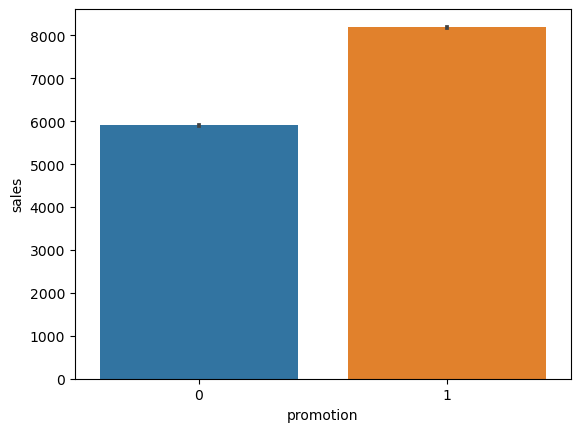

In [14]:
# Checking "promotion" vs "sales"
sns.barplot(x = df_past["promotion"], y = df_past["sales"], data = df_past, estimator = "mean")
plt.show()

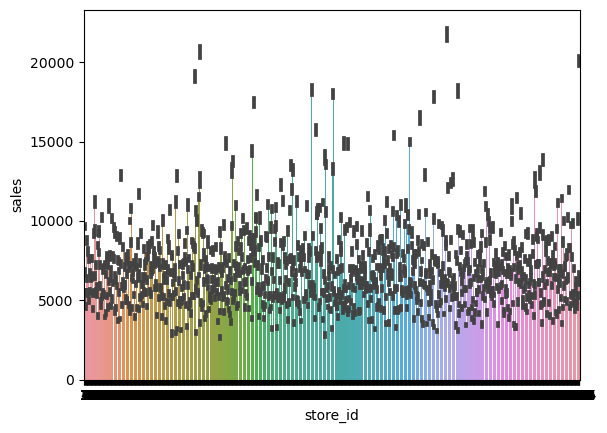

In [15]:
# Checking "store_id" vs "sales"
sns.barplot(x = df_past["store_id"], y = df_past["sales"], data = df_past, estimator = "mean")
plt.show()

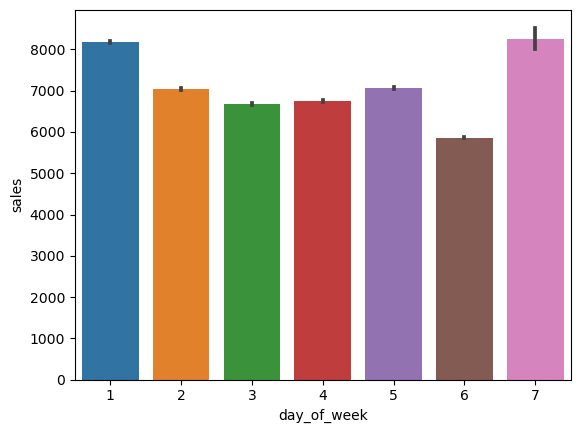

In [16]:
# Checking "day_of_week" vs "sales"
sns.barplot(x = df_past["day_of_week"], y = df_past["sales"], data = df_past, estimator = "mean")
plt.show()

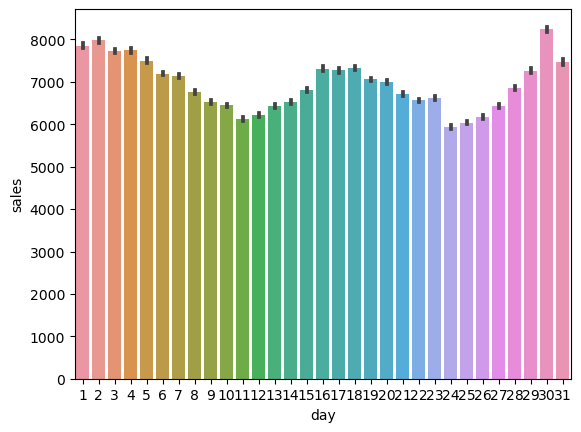

In [17]:
# Checking "day" vs "sales"
sns.barplot(x = df_past["day"], y = df_past["sales"], data = df_past, estimator = "mean")
plt.show()

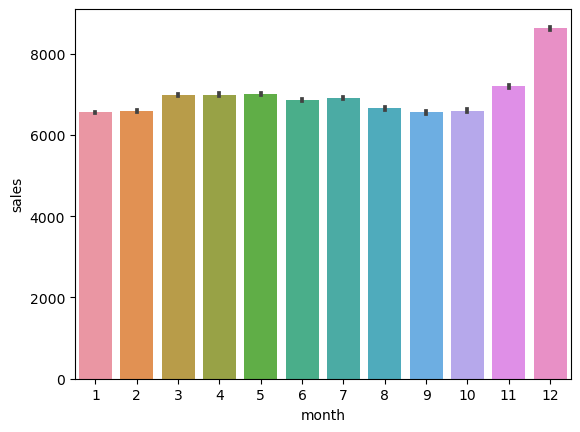

In [18]:
# Checking "month" vs "sales"
sns.barplot(x = df_past["month"], y = df_past["sales"], data = df_past, estimator = "mean")
plt.show()

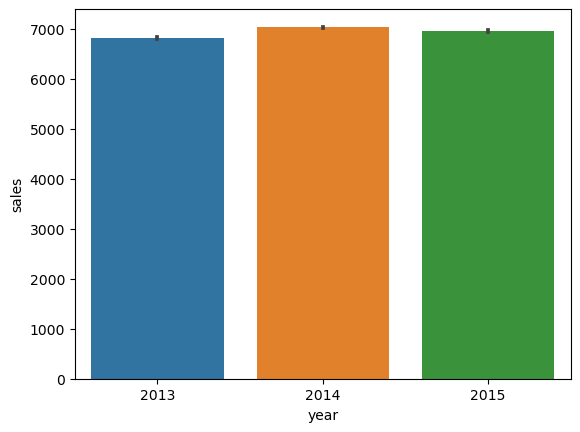

In [19]:
# Checking "year" vs "sales"
sns.barplot(x = df_past["year"], y = df_past["sales"], data = df_past, estimator = "mean")
plt.show()

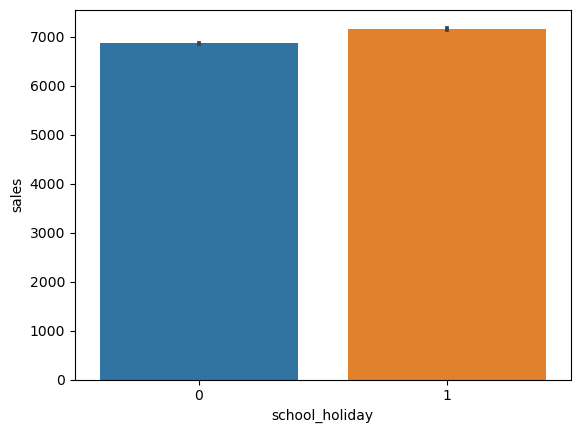

In [20]:
# Checking "school_holiday" vs "sales"
sns.barplot(x = df_past["school_holiday"], y = df_past["sales"], data = df_past, estimator = "mean")
plt.show()

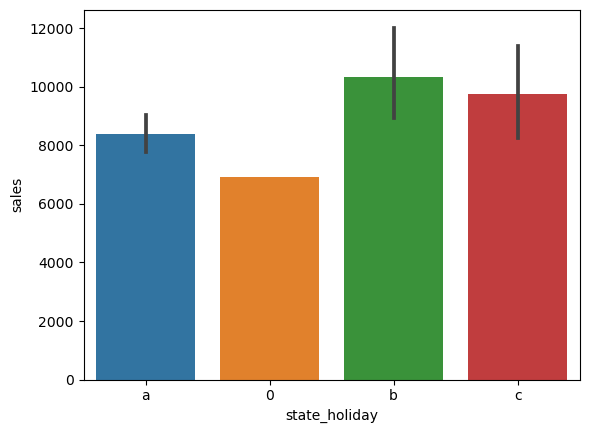

In [21]:
# Checking "state_holiday" vs "sales"
sns.barplot(x = df_past["state_holiday"], y = df_past["sales"], data = df_past, estimator = "mean")
plt.show()

In [22]:
# Checking how many rows have "a" state holidays in Past data and seeing when they occur 
print(len(df_past[df_past["state_holiday"] == "a"]))
df_past[df_past["state_holiday"] == "a"]

326


,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,year,month,day
0,676,2,777,0,a,1,3821,2013,1,1
1,274,2,729,0,a,1,3102,2013,1,1
2,423,2,1751,0,a,1,9643,2013,1,1
3,259,2,1444,0,a,1,6851,2013,1,1
4,769,2,1248,0,a,1,5035,2013,1,1
...,...,...,...,...,...,...,...,...,...,...
408523,353,4,1070,0,a,1,5383,2015,1,1
408524,335,4,675,0,a,1,3428,2015,1,1
408525,1081,4,556,0,a,1,3298,2015,1,1
410764,948,2,1810,1,a,0,10017,2015,1,6


In [23]:
# Checking how many rows have "b" state holidays in Past data and seeing when they occur 
print(len(df_past[df_past["state_holiday"] == "b"]))
df_past[df_past["state_holiday"] == "b"]

104


,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,year,month,day
51903,85,5,1836,1,b,1,13583,2013,3,29
51904,1097,5,2697,1,b,1,13069,2013,3,29
51905,769,5,2296,1,b,1,10489,2013,3,29
51906,733,5,3650,1,b,1,18431,2013,3,29
51907,423,5,2582,1,b,1,18243,2013,3,29
...,...,...,...,...,...,...,...,...,...,...
463939,562,1,3552,0,b,1,20025,2015,4,6
463940,512,1,1570,0,b,1,8751,2015,4,6
463941,769,1,3187,0,b,1,14090,2015,4,6
463942,578,1,497,0,b,1,4534,2015,4,6


In [24]:
# Checking how many rows have "c" state holidays in Past data and seeing when they occur 
print(len(df_past[df_past["state_holiday"] == "c"]))
df_past[df_past["state_holiday"] == "c"]

52


,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,year,month,day
209933,85,3,871,0,c,1,6138,2013,12,25
209934,512,3,923,0,c,1,5608,2013,12,25
209935,948,3,1320,0,c,1,7138,2013,12,25
209936,259,3,2024,0,c,1,11745,2013,12,25
209937,494,3,726,0,c,1,4657,2013,12,25
209938,274,3,1086,0,c,1,5687,2013,12,25
209939,353,3,1178,0,c,1,6148,2013,12,25
209940,262,3,3445,0,c,1,24245,2013,12,25
209941,1097,3,1762,0,c,1,8890,2013,12,25
209942,335,3,702,0,c,1,3888,2013,12,25


In [25]:
# Since there are only 156 rows related to "b" and "c" state_holidays in Past dataframe, and Future dataframe doesn't have those attributes, we won't consider them
df_past = df_past[(df_past["state_holiday"] != "b") & (df_past["state_holiday"] != "c")]

# Encoding 'state_holiday' in this dataframe
df_past.loc[df_past["state_holiday"] == "a", "state_holiday"] = 1
df_past.loc[df_past["state_holiday"] == "0", "state_holiday"] = 0
df_past["state_holiday"] = df_past["state_holiday"].astype(int)
print("state_holiday:", df_past["state_holiday"].unique())
df_past

state_holiday: [1 0]


,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,year,month,day
0,676,2,777,0,1,1,3821,2013,1,1
1,274,2,729,0,1,1,3102,2013,1,1
2,423,2,1751,0,1,1,9643,2013,1,1
3,259,2,1444,0,1,1,6851,2013,1,1
4,769,2,1248,0,1,1,5035,2013,1,1
...,...,...,...,...,...,...,...,...,...,...
473775,126,3,416,0,0,0,3856,2015,4,22
473776,715,3,613,0,0,0,5154,2015,4,22
473777,93,3,553,0,0,0,4923,2015,4,22
473778,845,3,302,0,0,0,3974,2015,4,22


In [26]:
# Encoding 'state_holiday' in the Future dataframe
df_future.loc[df_future["state_holiday"] == "a", "state_holiday"] = 1
df_future.loc[df_future["state_holiday"] == "0", "state_holiday"] = 0
df_future["state_holiday"] = df_future["state_holiday"].astype(int)
df_future

,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,year,month,day
0,761,3,955,0,0,0,2015,4,22
1,238,3,1025,0,0,0,2015,4,22
2,198,3,203,0,0,0,2015,4,22
3,606,3,585,0,0,0,2015,4,22
4,382,3,555,0,0,0,2015,4,22
...,...,...,...,...,...,...,...,...,...
58141,58,5,603,1,0,0,2015,7,31
58142,241,5,763,1,0,1,2015,7,31
58143,293,5,878,1,0,1,2015,7,31
58144,14,5,710,1,0,1,2015,7,31


In [27]:
# Correlations matrix
correlations_matrix = df_past.corr()
correlations_matrix

,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,year,month,day
store_id,1.000000,0.000892,0.034255,0.000639,0.002854,-0.000662,0.008676,0.000251,0.001338,-0.001678
day_of_week,0.000892,1.000000,-0.095208,-0.285009,0.001411,-0.142982,-0.174261,0.000024,-0.020478,0.003773
nb_customers_on_day,0.034255,-0.095208,1.000000,0.182844,0.034372,0.024887,0.827604,-0.001485,0.060088,-0.037250
promotion,0.000639,-0.285009,0.182844,1.000000,0.005373,0.019505,0.365431,0.022044,-0.006655,-0.136133
state_holiday,0.002854,0.001411,0.034372,0.005373,1.000000,0.001086,0.012498,-0.004540,0.001056,-0.004966
school_holiday,-0.000662,-0.142982,0.024887,0.019505,0.001086,1.000000,0.038577,-0.040126,0.113286,0.022409
sales,0.008676,-0.174261,0.827604,0.365431,0.012498,0.038577,1.000000,0.023434,0.080957,-0.058976
year,0.000251,0.000024,-0.001485,0.022044,-0.004540,-0.040126,0.023434,1.000000,-0.319377,-0.014219
month,0.001338,-0.020478,0.060088,-0.006655,0.001056,0.113286,0.080957,-0.319377,1.000000,-0.000195
day,-0.001678,0.003773,-0.037250,-0.136133,-0.004966,0.022409,-0.058976,-0.014219,-0.000195,1.000000


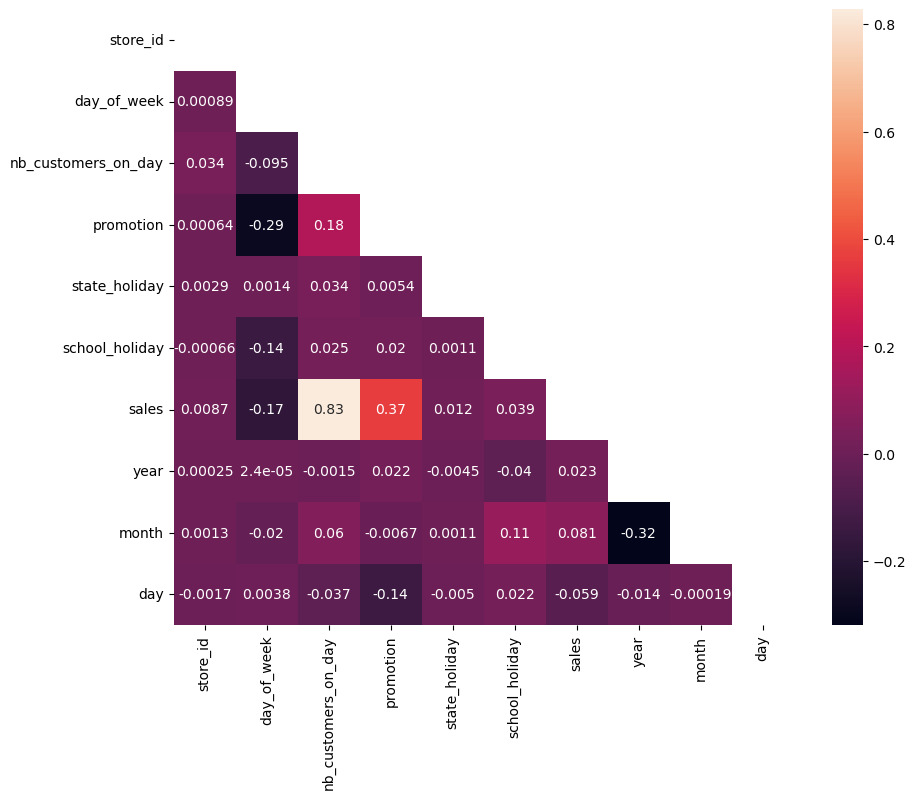

In [28]:
# Checking correlations
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# 1.2. Linear regression with most correlated variable

In [29]:
# Creating a new data frame with "nb_customers_on_day" and "sales"
df_customers = df_past[["nb_customers_on_day", "sales"]]
df_customers

,nb_customers_on_day,sales
0,777,3821
1,729,3102
2,1751,9643
3,1444,6851
4,1248,5035
...,...,...
473775,416,3856
473776,613,5154
473777,553,4923
473778,302,3974


In [30]:
# X-y split
X = df_customers.drop(columns=['sales'])
y = df_customers['sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
# Linear model
lm_model = linear_model.LinearRegression()
lm_model.fit(X_train, y_train)

predictions = lm_model.predict(X_test)

print("R2 values =", r2_score(y_test, predictions))
print("Mean squared error =", mean_squared_error(y_test, predictions))
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute error =", mean_absolute_error(y_test, predictions))

R2 values = 0.6841236362151472
Mean squared error = 3054258.872910999
Root mean squared error = 1747.6438060746243
Mean absolute error = 1259.1572064111454


# 1.3. Average payment by customer for each store

In [32]:
# Checking the average payment by customer for each store in the first half of the data frame
df_average_payment1 = df_past.iloc[0:236890, :].groupby(['store_id'], as_index=False)["nb_customers_on_day", "sales"].agg(["sum"])
df_average_payment1 = df_average_payment1.reset_index(level=['store_id'])
df_average_payment1.columns = ["store_id", "nb_customers_on_day_sum", "sales_sum"]
df_average_payment1["payment_by_customer"] = df_average_payment1["sales_sum"]/df_average_payment1["nb_customers_on_day_sum"]
df_average_payment1

,store_id,nb_customers_on_day_sum,sales_sum,payment_by_customer
0,1,121233,1015069,8.372877
1,2,128719,1080822,8.396756
2,3,167914,1525633,9.085800
3,4,270201,1936999,7.168734
4,5,118059,1014359,8.591967
...,...,...,...,...
1110,1111,104538,1181946,11.306377
1111,1112,181667,2243429,12.349128
1112,1113,163705,1472316,8.993714
1113,1114,675344,4281287,6.339417


In [33]:
# Checking the average payment by customer for each store in the second half of the data frame
df_average_payment2 = df_past.iloc[236890:, :].groupby(['store_id'], as_index=False)["nb_customers_on_day", "sales"].agg(["sum"])
df_average_payment2 = df_average_payment2.reset_index(level=['store_id'])
df_average_payment2.columns = ["store_id", "nb_customers_on_day_sum", "sales_sum"]
df_average_payment2["payment_by_customer"] = df_average_payment2["sales_sum"]/df_average_payment2["nb_customers_on_day_sum"]
df_average_payment2

,store_id,nb_customers_on_day_sum,sales_sum,payment_by_customer
0,1,129766,1097548,8.457901
1,2,143114,1218628,8.515086
2,3,163396,1490293,9.120743
3,4,319054,2347818,7.358685
4,5,120604,1046229,8.674911
...,...,...,...,...
1110,1111,99092,1172037,11.827766
1111,1112,183274,2178193,11.884899
1112,1113,163821,1533046,9.358055
1113,1114,683930,4415392,6.455912


In [34]:
# Comparing the average payment by customer for each store in both halfs
df_corr = pd.DataFrame()
df_corr["payment_by_customer_sample_1"] = df_average_payment1["payment_by_customer"]
df_corr["payment_by_customer_sample_2"] = df_average_payment2["payment_by_customer"]
df_corr

,payment_by_customer_sample_1,payment_by_customer_sample_2
0,8.372877,8.457901
1,8.396756,8.515086
2,9.085800,9.120743
3,7.168734,7.358685
4,8.591967,8.674911
...,...,...
1110,11.306377,11.827766
1111,12.349128,11.884899
1112,8.993714,9.358055
1113,6.339417,6.455912


In [35]:
# Check if they seem correlated
correlations_matrix = df_corr.corr()
correlations_matrix

,payment_by_customer_sample_1,payment_by_customer_sample_2
payment_by_customer_sample_1,1.00000,0.99319
payment_by_customer_sample_2,0.99319,1.00000


# 1.4. New linear regression adding the 'payment by customer' variable

In [36]:
# Creating a new data frame with "store_id", "nb_customers_on_day" and "sales"
df_avg_pay = df_past[["store_id", "nb_customers_on_day", "sales"]]
df_avg_pay

,store_id,nb_customers_on_day,sales
0,676,777,3821
1,274,729,3102
2,423,1751,9643
3,259,1444,6851
4,769,1248,5035
...,...,...,...
473775,126,416,3856
473776,715,613,5154
473777,93,553,4923
473778,845,302,3974


In [37]:
# X-y split
X = df_avg_pay.drop(columns=['sales'])
y = df_avg_pay['sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
# Train data frame
df_train = pd.concat([X_train, y_train], axis = 1)
df_train

,store_id,nb_customers_on_day,sales
375681,291,880,7949
193208,509,485,5761
293322,932,816,9209
206851,480,810,7095
327925,1054,560,5123
...,...,...,...
259239,261,1038,13541
365936,799,1069,11754
131967,954,864,6484
146902,166,937,7834


In [39]:
# Train data frame
df_test = pd.concat([X_test, y_test], axis = 1)
df_test

,store_id,nb_customers_on_day,sales
465464,451,425,4650
287878,454,809,6506
68665,88,218,2051
316449,230,896,7157
194541,466,745,7652
...,...,...,...
77078,686,982,7791
406035,777,349,3620
152181,214,598,6451
52310,99,598,6101


In [40]:
# Creating a data frame with the average payment by customer for each store in the Train data frame
df_pay = df_train.groupby(['store_id'], as_index=False)["nb_customers_on_day", "sales"].agg(["sum"])
df_pay.columns = ["nb_customers_on_day_sum", "sales_sum"]
df_pay["payment_by_customer"] = df_pay["sales_sum"]/df_pay["nb_customers_on_day_sum"]
df_pay = pd.DataFrame(df_pay["payment_by_customer"])
df_pay

,payment_by_customer
store_id,
1,8.418542
2,8.446877
3,9.100451
4,7.285677
5,8.660290
...,...
1111,11.553221
1112,12.166099
1113,9.216527


In [41]:
# Updating Train dataframe with 'payment_by_customer' information from Train data
df_train["payment_by_customer"] = ""
for store in range(1,1116):
    df_train.loc[(df_train["store_id"] == store), "payment_by_customer"] = df_pay.loc[store, "payment_by_customer"]
df_train

,store_id,nb_customers_on_day,sales,payment_by_customer
375681,291,880,7949,9.531748
193208,509,485,5761,11.590703
293322,932,816,9209,10.082962
206851,480,810,7095,7.865691
327925,1054,560,5123,9.704097
...,...,...,...,...
259239,261,1038,13541,13.28557
365936,799,1069,11754,10.966704
131967,954,864,6484,7.673156
146902,166,937,7834,7.119247


In [42]:
# Updating Test data frame with 'payment_by_customer' information from Train data
df_test["payment_by_customer"] = ""
for store in range(1,1116):
    df_test.loc[(df_test["store_id"] == store), "payment_by_customer"] = df_pay.loc[store, "payment_by_customer"]
df_test

,store_id,nb_customers_on_day,sales,payment_by_customer
465464,451,425,4650,11.772535
287878,454,809,6506,8.162983
68665,88,218,2051,9.773505
316449,230,896,7157,7.978458
194541,466,745,7652,10.128581
...,...,...,...,...
77078,686,982,7791,8.216137
406035,777,349,3620,11.276993
152181,214,598,6451,12.93042
52310,99,598,6101,10.95981


In [43]:
# Defining X_train, X_test, y_train, y_test
X_train = df_train.drop(["store_id", "sales"], axis = 1)
X_test = df_test.drop(["store_id", "sales"], axis = 1)
y_train = df_train["sales"]
y_test = df_test["sales"]

In [44]:
# Linear model
lm_model = linear_model.LinearRegression()
lm_model.fit(X_train, y_train)

predictions = lm_model.predict(X_test)

print("R2 values =", r2_score(y_test, predictions))
print("Mean squared error =", mean_squared_error(y_test, predictions))
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute error =", mean_absolute_error(y_test, predictions))

R2 values = 0.8397896068692567
Mean squared error = 1549099.8088271534
Root mean squared error = 1244.6283818181046
Mean absolute error = 805.2677245497852


# 1.5. New linear regression adding the 'predicted sales' variable

In [45]:
# Computing 'prediction of sales' variable in Train data
df_train["pred_sales"] = df_train["nb_customers_on_day"]*df_train["payment_by_customer"]
df_train

,store_id,nb_customers_on_day,sales,payment_by_customer,pred_sales
375681,291,880,7949,9.531748,8387.938306
193208,509,485,5761,11.590703,5621.491035
293322,932,816,9209,10.082962,8227.696738
206851,480,810,7095,7.865691,6371.209547
327925,1054,560,5123,9.704097,5434.294299
...,...,...,...,...,...
259239,261,1038,13541,13.28557,13790.421994
365936,799,1069,11754,10.966704,11723.406329
131967,954,864,6484,7.673156,6629.606914
146902,166,937,7834,7.119247,6670.73466


In [46]:
# Computing 'prediction of sales' variable in Test data
df_test["pred_sales"] = df_test["nb_customers_on_day"]*df_test["payment_by_customer"]
df_test

,store_id,nb_customers_on_day,sales,payment_by_customer,pred_sales
465464,451,425,4650,11.772535,5003.327477
287878,454,809,6506,8.162983,6603.85325
68665,88,218,2051,9.773505,2130.624021
316449,230,896,7157,7.978458,7148.698739
194541,466,745,7652,10.128581,7545.792878
...,...,...,...,...,...
77078,686,982,7791,8.216137,8068.246174
406035,777,349,3620,11.276993,3935.670721
152181,214,598,6451,12.93042,7732.391366
52310,99,598,6101,10.95981,6553.966577


In [47]:
# X-y split
X_train = df_train.drop(["store_id", "sales"], axis = 1)
y_train = df_train["sales"]
X_test = df_test.drop(["store_id", "sales"], axis = 1)
y_test = df_test["sales"]

In [48]:
# Linear model
lm_model = linear_model.LinearRegression()
lm_model.fit(X_train, y_train)

predictions = lm_model.predict(X_test)

print("R2 values =", r2_score(y_test, predictions))
print("Mean squared error =", mean_squared_error(y_test, predictions))
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute error =", mean_absolute_error(y_test, predictions))

R2 values = 0.9440777594276911
Mean squared error = 540721.0511558644
Root mean squared error = 735.3373723372588
Mean absolute error = 530.7757713633741


# 2. Models

# 2.1. One hot encoding

In [49]:
# Enconding dates

# Encoding year
dummies_year = pd.get_dummies(df_past["year"], drop_first = True)
df_past = pd.concat([df_past.drop(["year"], axis = 1), dummies_year], axis = 1)
df_past.rename(columns={2014: "year_2014", 2015: "year_2015"}, inplace=True)

df_future["year_2014"] = 0
df_future["year_2015"] = 1
df_future = df_future.drop(["year"], axis = 1)

# Encoding month
dummies_month = pd.get_dummies(df_past["month"], drop_first = True)
df_past = pd.concat([df_past.drop(["month"], axis = 1), dummies_month], axis = 1)
for _ in range(2,13):
    df_past.rename(columns={ _ : "month_" + str(_)}, inplace=True)

for _ in range(2,4):
    df_future["month_" + str(_)] = 0

dummies_month = pd.get_dummies(df_future["month"], drop_first = False)
df_future = pd.concat([df_future, dummies_month], axis = 1)

for _ in range(4,8):
    df_future.rename(columns={ _ : "month_" + str(_)}, inplace=True)
    
for _ in range(8,13):
    df_future["month_" + str(_)] = 0
    
df_future = df_future.drop("month", axis = 1)

# Encoding day
dummies_day = pd.get_dummies(df_past["day"], drop_first = True)
df_past = pd.concat([df_past.drop(["day"], axis = 1), dummies_day], axis = 1)
for _ in range(2,32):
    df_past.rename(columns={ _ : "day_" + str(_)}, inplace=True)
    
dummies_day = pd.get_dummies(df_future["day"], drop_first = True)
df_future = pd.concat([df_future.drop(["day"], axis = 1), dummies_day], axis = 1)
for _ in range(2,32):
    df_future.rename(columns={ _ : "day_" + str(_)}, inplace=True)
    
# Encoding day of the week
dummies_week = pd.get_dummies(df_past["day_of_week"], drop_first = True)
df_past = pd.concat([df_past.drop(["day_of_week"], axis = 1), dummies_week], axis = 1)
for _ in range(2,8):
    df_past.rename(columns={ _ : "day_of_week_" + str(_)}, inplace=True)
    
dummies_week = pd.get_dummies(df_future["day_of_week"], drop_first = True)
df_future = pd.concat([df_future.drop(["day_of_week"], axis = 1), dummies_week], axis = 1)
for _ in range(2,8):
    df_future.rename(columns={ _ : "day_of_week_" + str(_)}, inplace=True)

In [50]:
# Creating 'payment_by_customer' and 'pred_sales' columns
df_past["payment_by_customer"] = 0
df_past["pred_sales"] = 0

df_future["payment_by_customer"] = 0
df_future["pred_sales"] = 0

In [51]:
# Future data frame
df_future

,store_id,nb_customers_on_day,promotion,state_holiday,school_holiday,year_2014,year_2015,month_2,month_3,month_4,...,day_30,day_31,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,payment_by_customer,pred_sales
0,761,955,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,238,1025,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,198,203,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,606,585,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,382,555,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58141,58,603,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
58142,241,763,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
58143,293,878,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
58144,14,710,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [52]:
# Past data frame
df_past

,store_id,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,year_2014,year_2015,month_2,month_3,...,day_30,day_31,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,payment_by_customer,pred_sales
0,676,777,0,1,1,3821,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,274,729,0,1,1,3102,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,423,1751,0,1,1,9643,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,259,1444,0,1,1,6851,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,769,1248,0,1,1,5035,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473775,126,416,0,0,0,3856,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
473776,715,613,0,0,0,5154,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
473777,93,553,0,0,0,4923,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
473778,845,302,0,0,0,3974,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# 2.2. Creating a train-test function

In [53]:
def train_test(cols, r_state):

    global X_train
    global X_test
    global y_train
    global y_test

    # X-y split
    X = df_past.drop(columns=['sales'])
    y = df_past['sales']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = r_state)

    # df_train and df_test
    df_train = pd.concat([X_train, y_train], axis = 1)
    df_test = pd.concat([X_test, y_test], axis = 1)

    # Computing 'Payment_by_customer' and 'pred_sales' in df_train
    df_pay = df_train.groupby(['store_id'], as_index=False)["nb_customers_on_day", "sales"].agg(["sum"])
    df_pay.columns = ["nb_customers_on_day_sum", "sales_sum"]
    df_pay["payment_by_customer"] = df_pay["sales_sum"]/df_pay["nb_customers_on_day_sum"]
    df_pay = pd.DataFrame(df_pay["payment_by_customer"])

    for store in range(1,1116):
        df_train.loc[(df_train["store_id"] == store), "payment_by_customer"] = df_pay.loc[store, "payment_by_customer"]
        
    df_train["pred_sales"] = df_train["nb_customers_on_day"]*df_train["payment_by_customer"]

    # Computing 'Payment_by_customer' and 'pred_sales' in df_test
    for store in range(1,1116):
        df_test.loc[(df_test["store_id"] == store), "payment_by_customer"] = df_pay.loc[store, "payment_by_customer"]

    df_test["pred_sales"] = df_test["nb_customers_on_day"]*df_test["payment_by_customer"]

    # X_train, X_test, y_train, y_test
    X_train = df_train[cols]
    X_test = df_test[cols]
    y_train = df_train["sales"]
    y_test = df_test["sales"]

In [54]:
# Testing the function
cols = ["nb_customers_on_day", "payment_by_customer", "pred_sales"]
train_test(cols, 42)

# Linear model
lm_model = linear_model.LinearRegression()
lm_model.fit(X_train, y_train)

predictions = lm_model.predict(X_test)
predictions

print("R2 values =", r2_score(y_test, predictions))
print("Mean squared error =", mean_squared_error(y_test, predictions))
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute error =", mean_absolute_error(y_test, predictions))

R2 values = 0.9440777594276911
Mean squared error = 540721.0511558644
Root mean squared error = 735.3373723372588
Mean absolute error = 530.7757713633741


In [55]:
# All independent variables
all_columns = ["pred_sales", "payment_by_customer", "day_of_week_2", "day_of_week_3", "day_of_week_4", "day_of_week_5", "day_of_week_6", "day_of_week_7", "day_2", "day_3", "day_4", "day_5", "day_6", "day_7", "day_8", "day_9", "day_10", "day_11", "day_12", "day_13", "day_14", "day_15", "day_16", "day_17", "day_18", "day_19", "day_20", "day_21", "day_22", "day_23", "day_24", "day_25", "day_26", "day_27", "day_28", "day_29", "day_30", "day_31", "month_2", "month_3", "month_4", "month_5", "month_6", "month_7", "month_8", "month_9", "month_10", "month_11", "month_12", "year_2014", "year_2015", "school_holiday", "state_holiday", "promotion", "nb_customers_on_day"]

# 2.3. Linear model

In [56]:
# Train-test split
train_test(all_columns, 42)

# Linear model
lm_model = linear_model.LinearRegression()
lm_model.fit(X_train, y_train)

predictions = lm_model.predict(X_test)

print("R2 values =", r2_score(y_test, predictions))
print("Mean squared error =", mean_squared_error(y_test, predictions))
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute error =", mean_absolute_error(y_test, predictions))

R2 values = 0.9698845155586205
Mean squared error = 291191.41573297756
Root mean squared error = 539.6215486180824
Mean absolute error = 375.5640605228186


# 2.4. Decision tree model

In [57]:
# Train-test split
train_test(all_columns, 42)

# Decision tree model
tree_model = DecisionTreeRegressor(max_depth = 12)
tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)

print("R2 values =", r2_score(y_test, predictions))
print("Mean squared error =", mean_squared_error(y_test, predictions))
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute error =", mean_absolute_error(y_test, predictions))

R2 values = 0.9735743919467751
Mean squared error = 255513.41322772592
Root mean squared error = 505.4833461428041
Mean absolute error = 338.1319480346392


# 2.5. Random forest model

In [58]:
# Train-test split
train_test(all_columns, 42)

# Random forest model
rf_model = RandomForestRegressor(n_estimators = 150, max_depth = 50, min_samples_split = 5, min_samples_leaf = 1, random_state = 42)
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

print("R2 values =", r2_score(y_test, predictions))
print("Mean squared error =", mean_squared_error(y_test, predictions))
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute error =", mean_absolute_error(y_test, predictions))

R2 values = 0.9777174822316297
Mean squared error = 215453.21336925428
Root mean squared error = 464.16938004273214
Mean absolute error = 312.983845050307


# 2.6. KNN model

In [59]:
# Train-test split
train_test(all_columns, 42)

# KNN model
knn_model = KNeighborsRegressor(n_neighbors = 75)
knn_model.fit(X_train, y_train)

predictions = knn_model.predict(X_test)

print("R2 values =", r2_score(y_test, predictions))
print("Mean squared error =", mean_squared_error(y_test, predictions))
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute error =", mean_absolute_error(y_test, predictions))

R2 values = 0.9452617917588467
Mean squared error = 529272.453958169
Root mean squared error = 727.511136655769
Mean absolute error = 522.9352752353304


# 2.7. CatBoost model

In [60]:
# Train-test split
train_test(all_columns, 42)

# CatBoost model
ctr = CatBoostRegressor(eval_metric='RMSE', loss_function= 'RMSE', depth= 15, iterations= 1500, l2_leaf_reg= 1, learning_rate= 0.05)
ctr.fit(X_train, y_train)

predictions = ctr.predict(X_test)

print("The R2 of the model on the training data is = ", r2_score(y_test,predictions))
print("Mean squared error =", mean_squared_error(y_test,predictions))
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test,predictions)))
print("Mean absolute error =", mean_absolute_error(y_test,predictions))

0:	learn: 2953.9666457	total: 755ms	remaining: 18m 51s
1:	learn: 2816.1070394	total: 1.44s	remaining: 17m 59s
2:	learn: 2684.4469717	total: 2.15s	remaining: 17m 51s
3:	learn: 2559.5677863	total: 2.78s	remaining: 17m 18s
4:	learn: 2441.7922890	total: 3.37s	remaining: 16m 47s
5:	learn: 2329.0584466	total: 3.95s	remaining: 16m 24s
6:	learn: 2223.1979977	total: 4.57s	remaining: 16m 13s
7:	learn: 2122.4442953	total: 5.16s	remaining: 16m 2s
8:	learn: 2026.0799612	total: 5.76s	remaining: 15m 55s
9:	learn: 1935.1368522	total: 6.37s	remaining: 15m 49s
10:	learn: 1848.7248022	total: 6.96s	remaining: 15m 42s
11:	learn: 1767.5938676	total: 7.56s	remaining: 15m 37s
12:	learn: 1689.8494896	total: 8.16s	remaining: 15m 33s
13:	learn: 1616.7335882	total: 8.79s	remaining: 15m 33s
14:	learn: 1548.1858512	total: 9.37s	remaining: 15m 27s
15:	learn: 1482.3627354	total: 9.97s	remaining: 15m 24s
16:	learn: 1420.5337405	total: 10.1s	remaining: 14m 41s
17:	learn: 1361.7415509	total: 10.7s	remaining: 14m 40s
18:

149:	learn: 437.1084968	total: 1m 30s	remaining: 13m 30s
150:	learn: 436.7657856	total: 1m 30s	remaining: 13m 29s
151:	learn: 436.4729659	total: 1m 31s	remaining: 13m 28s
152:	learn: 436.1960222	total: 1m 31s	remaining: 13m 27s
153:	learn: 435.9401546	total: 1m 32s	remaining: 13m 26s
154:	learn: 435.6950726	total: 1m 32s	remaining: 13m 25s
155:	learn: 435.4172348	total: 1m 33s	remaining: 13m 24s
156:	learn: 435.0920161	total: 1m 34s	remaining: 13m 24s
157:	learn: 434.8450318	total: 1m 34s	remaining: 13m 24s
158:	learn: 434.5788197	total: 1m 35s	remaining: 13m 23s
159:	learn: 434.3095650	total: 1m 35s	remaining: 13m 23s
160:	learn: 434.0481806	total: 1m 36s	remaining: 13m 22s
161:	learn: 433.8584020	total: 1m 37s	remaining: 13m 21s
162:	learn: 433.6167542	total: 1m 37s	remaining: 13m 21s
163:	learn: 433.3869127	total: 1m 38s	remaining: 13m 21s
164:	learn: 433.1025856	total: 1m 38s	remaining: 13m 20s
165:	learn: 432.8018444	total: 1m 39s	remaining: 13m 20s
166:	learn: 432.5241246	total: 

294:	learn: 411.5457941	total: 2m 54s	remaining: 11m 54s
295:	learn: 411.3830493	total: 2m 55s	remaining: 11m 54s
296:	learn: 411.2456699	total: 2m 56s	remaining: 11m 53s
297:	learn: 411.1378515	total: 2m 56s	remaining: 11m 53s
298:	learn: 410.9746404	total: 2m 57s	remaining: 11m 52s
299:	learn: 410.8935430	total: 2m 58s	remaining: 11m 52s
300:	learn: 410.7805816	total: 2m 58s	remaining: 11m 51s
301:	learn: 410.6327645	total: 2m 59s	remaining: 11m 51s
302:	learn: 410.5181715	total: 2m 59s	remaining: 11m 50s
303:	learn: 410.3812114	total: 3m	remaining: 11m 49s
304:	learn: 410.2562462	total: 3m 1s	remaining: 11m 49s
305:	learn: 410.1283220	total: 3m 1s	remaining: 11m 48s
306:	learn: 409.9590131	total: 3m 2s	remaining: 11m 47s
307:	learn: 409.8546934	total: 3m 2s	remaining: 11m 47s
308:	learn: 409.7132553	total: 3m 3s	remaining: 11m 46s
309:	learn: 409.5561331	total: 3m 3s	remaining: 11m 46s
310:	learn: 409.4382671	total: 3m 4s	remaining: 11m 45s
311:	learn: 409.2816313	total: 3m 5s	remai

439:	learn: 396.3001311	total: 4m 21s	remaining: 10m 28s
440:	learn: 396.2015283	total: 4m 21s	remaining: 10m 28s
441:	learn: 396.1256531	total: 4m 22s	remaining: 10m 27s
442:	learn: 396.0565709	total: 4m 22s	remaining: 10m 27s
443:	learn: 395.9755924	total: 4m 23s	remaining: 10m 26s
444:	learn: 395.8882867	total: 4m 23s	remaining: 10m 25s
445:	learn: 395.7880182	total: 4m 24s	remaining: 10m 25s
446:	learn: 395.6880702	total: 4m 25s	remaining: 10m 24s
447:	learn: 395.6054530	total: 4m 25s	remaining: 10m 24s
448:	learn: 395.5202831	total: 4m 26s	remaining: 10m 23s
449:	learn: 395.4599238	total: 4m 26s	remaining: 10m 22s
450:	learn: 395.3855947	total: 4m 27s	remaining: 10m 22s
451:	learn: 395.3015160	total: 4m 28s	remaining: 10m 21s
452:	learn: 395.2447455	total: 4m 28s	remaining: 10m 21s
453:	learn: 395.1818413	total: 4m 29s	remaining: 10m 20s
454:	learn: 395.1266299	total: 4m 29s	remaining: 10m 20s
455:	learn: 395.0620241	total: 4m 30s	remaining: 10m 19s
456:	learn: 394.9654073	total: 

586:	learn: 384.6747691	total: 5m 51s	remaining: 9m 6s
587:	learn: 384.6070241	total: 5m 51s	remaining: 9m 5s
588:	learn: 384.5610272	total: 5m 52s	remaining: 9m 5s
589:	learn: 384.4836101	total: 5m 53s	remaining: 9m 4s
590:	learn: 384.4156499	total: 5m 53s	remaining: 9m 4s
591:	learn: 384.3743333	total: 5m 54s	remaining: 9m 3s
592:	learn: 384.3205827	total: 5m 55s	remaining: 9m 3s
593:	learn: 384.2370720	total: 5m 55s	remaining: 9m 2s
594:	learn: 384.1559372	total: 5m 56s	remaining: 9m 1s
595:	learn: 384.0548356	total: 5m 56s	remaining: 9m 1s
596:	learn: 383.9971341	total: 5m 57s	remaining: 9m
597:	learn: 383.9007851	total: 5m 58s	remaining: 9m
598:	learn: 383.7865355	total: 5m 58s	remaining: 8m 59s
599:	learn: 383.6648186	total: 5m 59s	remaining: 8m 59s
600:	learn: 383.6094994	total: 5m 59s	remaining: 8m 58s
601:	learn: 383.5381400	total: 6m	remaining: 8m 57s
602:	learn: 383.4696242	total: 6m 1s	remaining: 8m 57s
603:	learn: 383.3954284	total: 6m 1s	remaining: 8m 56s
604:	learn: 383.

734:	learn: 375.1668875	total: 7m 23s	remaining: 7m 41s
735:	learn: 375.0903833	total: 7m 23s	remaining: 7m 40s
736:	learn: 375.0062041	total: 7m 24s	remaining: 7m 39s
737:	learn: 374.9349648	total: 7m 24s	remaining: 7m 39s
738:	learn: 374.8653078	total: 7m 25s	remaining: 7m 38s
739:	learn: 374.8156494	total: 7m 26s	remaining: 7m 38s
740:	learn: 374.7544423	total: 7m 26s	remaining: 7m 37s
741:	learn: 374.6990258	total: 7m 27s	remaining: 7m 36s
742:	learn: 374.6370051	total: 7m 27s	remaining: 7m 36s
743:	learn: 374.5749514	total: 7m 28s	remaining: 7m 35s
744:	learn: 374.5128485	total: 7m 29s	remaining: 7m 35s
745:	learn: 374.4623553	total: 7m 29s	remaining: 7m 34s
746:	learn: 374.4044456	total: 7m 30s	remaining: 7m 34s
747:	learn: 374.3286945	total: 7m 31s	remaining: 7m 33s
748:	learn: 374.2659518	total: 7m 31s	remaining: 7m 32s
749:	learn: 374.2085559	total: 7m 32s	remaining: 7m 32s
750:	learn: 374.1517366	total: 7m 32s	remaining: 7m 31s
751:	learn: 374.0485291	total: 7m 33s	remaining:

882:	learn: 366.5759404	total: 8m 54s	remaining: 6m 13s
883:	learn: 366.5146616	total: 8m 54s	remaining: 6m 12s
884:	learn: 366.4596377	total: 8m 55s	remaining: 6m 12s
885:	learn: 366.4214096	total: 8m 56s	remaining: 6m 11s
886:	learn: 366.3727427	total: 8m 57s	remaining: 6m 11s
887:	learn: 366.3209420	total: 8m 57s	remaining: 6m 10s
888:	learn: 366.2717159	total: 8m 58s	remaining: 6m 10s
889:	learn: 366.2223865	total: 8m 59s	remaining: 6m 9s
890:	learn: 366.1686548	total: 9m	remaining: 6m 9s
891:	learn: 366.1010471	total: 9m 1s	remaining: 6m 8s
892:	learn: 366.0312039	total: 9m 2s	remaining: 6m 8s
893:	learn: 365.9748602	total: 9m 3s	remaining: 6m 8s
894:	learn: 365.9130506	total: 9m 4s	remaining: 6m 8s
895:	learn: 365.8085818	total: 9m 7s	remaining: 6m 9s
896:	learn: 365.7582877	total: 9m 10s	remaining: 6m 9s
897:	learn: 365.7028871	total: 9m 11s	remaining: 6m 9s
898:	learn: 365.6558877	total: 9m 12s	remaining: 6m 9s
899:	learn: 365.5879898	total: 9m 13s	remaining: 6m 8s
900:	learn: 

1029:	learn: 358.7584778	total: 10m 32s	remaining: 4m 48s
1030:	learn: 358.7105811	total: 10m 33s	remaining: 4m 48s
1031:	learn: 358.6585584	total: 10m 33s	remaining: 4m 47s
1032:	learn: 358.6073197	total: 10m 34s	remaining: 4m 46s
1033:	learn: 358.5762791	total: 10m 35s	remaining: 4m 46s
1034:	learn: 358.5471223	total: 10m 35s	remaining: 4m 45s
1035:	learn: 358.5129609	total: 10m 36s	remaining: 4m 44s
1036:	learn: 358.4637249	total: 10m 36s	remaining: 4m 44s
1037:	learn: 358.4220388	total: 10m 37s	remaining: 4m 43s
1038:	learn: 358.3984140	total: 10m 38s	remaining: 4m 43s
1039:	learn: 358.3614842	total: 10m 38s	remaining: 4m 42s
1040:	learn: 358.3298305	total: 10m 39s	remaining: 4m 41s
1041:	learn: 358.2789566	total: 10m 40s	remaining: 4m 41s
1042:	learn: 358.2303460	total: 10m 40s	remaining: 4m 40s
1043:	learn: 358.2056794	total: 10m 41s	remaining: 4m 40s
1044:	learn: 358.1851712	total: 10m 41s	remaining: 4m 39s
1045:	learn: 358.1598320	total: 10m 42s	remaining: 4m 38s
1046:	learn: 3

1171:	learn: 352.4303317	total: 11m 59s	remaining: 3m 21s
1172:	learn: 352.3879966	total: 11m 59s	remaining: 3m 20s
1173:	learn: 352.3363596	total: 12m	remaining: 3m 20s
1174:	learn: 352.3051645	total: 12m 1s	remaining: 3m 19s
1175:	learn: 352.2513293	total: 12m 1s	remaining: 3m 18s
1176:	learn: 352.2218059	total: 12m 2s	remaining: 3m 18s
1177:	learn: 352.1710270	total: 12m 2s	remaining: 3m 17s
1178:	learn: 352.1177920	total: 12m 3s	remaining: 3m 16s
1179:	learn: 352.0982439	total: 12m 4s	remaining: 3m 16s
1180:	learn: 352.0450641	total: 12m 4s	remaining: 3m 15s
1181:	learn: 351.9942418	total: 12m 5s	remaining: 3m 15s
1182:	learn: 351.9423231	total: 12m 5s	remaining: 3m 14s
1183:	learn: 351.9146925	total: 12m 6s	remaining: 3m 13s
1184:	learn: 351.8727739	total: 12m 7s	remaining: 3m 13s
1185:	learn: 351.8065364	total: 12m 7s	remaining: 3m 12s
1186:	learn: 351.7521576	total: 12m 8s	remaining: 3m 12s
1187:	learn: 351.6917106	total: 12m 8s	remaining: 3m 11s
1188:	learn: 351.6362446	total: 

1314:	learn: 346.3089175	total: 13m 26s	remaining: 1m 53s
1315:	learn: 346.2679024	total: 13m 27s	remaining: 1m 52s
1316:	learn: 346.2164702	total: 13m 28s	remaining: 1m 52s
1317:	learn: 346.1715186	total: 13m 28s	remaining: 1m 51s
1318:	learn: 346.1140172	total: 13m 29s	remaining: 1m 51s
1319:	learn: 346.0815172	total: 13m 29s	remaining: 1m 50s
1320:	learn: 346.0373086	total: 13m 30s	remaining: 1m 49s
1321:	learn: 345.9867750	total: 13m 31s	remaining: 1m 49s
1322:	learn: 345.9373619	total: 13m 31s	remaining: 1m 48s
1323:	learn: 345.9154489	total: 13m 32s	remaining: 1m 47s
1324:	learn: 345.8788512	total: 13m 32s	remaining: 1m 47s
1325:	learn: 345.8293322	total: 13m 33s	remaining: 1m 46s
1326:	learn: 345.8012542	total: 13m 34s	remaining: 1m 46s
1327:	learn: 345.7772241	total: 13m 34s	remaining: 1m 45s
1328:	learn: 345.7340406	total: 13m 35s	remaining: 1m 44s
1329:	learn: 345.6963003	total: 13m 36s	remaining: 1m 44s
1330:	learn: 345.6534587	total: 13m 36s	remaining: 1m 43s
1331:	learn: 3

1458:	learn: 340.9060473	total: 14m 55s	remaining: 25.2s
1459:	learn: 340.8782928	total: 14m 56s	remaining: 24.6s
1460:	learn: 340.8358957	total: 14m 56s	remaining: 23.9s
1461:	learn: 340.8058481	total: 14m 57s	remaining: 23.3s
1462:	learn: 340.7495377	total: 14m 58s	remaining: 22.7s
1463:	learn: 340.7205663	total: 14m 58s	remaining: 22.1s
1464:	learn: 340.6927172	total: 14m 59s	remaining: 21.5s
1465:	learn: 340.6550344	total: 14m 59s	remaining: 20.9s
1466:	learn: 340.6259834	total: 15m	remaining: 20.3s
1467:	learn: 340.5959264	total: 15m 1s	remaining: 19.6s
1468:	learn: 340.5649737	total: 15m 1s	remaining: 19s
1469:	learn: 340.5294132	total: 15m 2s	remaining: 18.4s
1470:	learn: 340.4930495	total: 15m 2s	remaining: 17.8s
1471:	learn: 340.4583500	total: 15m 3s	remaining: 17.2s
1472:	learn: 340.4145852	total: 15m 4s	remaining: 16.6s
1473:	learn: 340.3766111	total: 15m 4s	remaining: 16s
1474:	learn: 340.3376731	total: 15m 5s	remaining: 15.3s
1475:	learn: 340.2996824	total: 15m 5s	remainin

# 2.8. XGBoost model

In [61]:
# Train-test split
train_test(all_columns, 42)

# XGBoost model
xgb = XGBRegressor(objective ='reg:squarederror',loss_function= 'neg_mean_squared_error', n_estimators= 1100, learning_rate= 0.5, min_child_weight= 4, max_depth= 5)
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)

print("The R2 of the model on the training data is = ", r2_score(y_test,predictions))
print("Mean squared error =", mean_squared_error(y_test,predictions))
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test,predictions)))
print("Mean absolute error =", mean_absolute_error(y_test,predictions))

The R2 of the model on the training data is =  0.9802628367007763
Mean squared error = 190841.77559358804
Root mean squared error = 436.8544100653993
Mean absolute error = 291.6104202202047


# 3. Best parameters and Cross validation

# 3.1. All combinations of variables

In [ ]:
# All independent variables
vars ={"0": ["nb_customers_on_day"],
       "1": ["promotion"],
       "2": ["state_holiday"],
       "3": ["school_holiday"],
       "4": ["year_2014", "year_2015"],
       "5": ["month_2", "month_3", "month_4", "month_5", "month_6", "month_7", "month_8", "month_9", "month_10", "month_11", "month_12"],
       "6": ["day_2", "day_3", "day_4", "day_5", "day_6", "day_7", "day_8", "day_9", "day_10", "day_11", "day_12", "day_13", "day_14", "day_15", "day_16", "day_17", "day_18", "day_19", "day_20", "day_21", "day_22", "day_23", "day_24", "day_25", "day_26", "day_27", "day_28", "day_29", "day_30", "day_31"],
       "7": ["day_of_week_2", "day_of_week_3", "day_of_week_4", "day_of_week_5", "day_of_week_6", "day_of_week_7"],
       "8": ["payment_by_customer"],
       "9": ["pred_sales"]}

In [ ]:
# All possible combination of independent variables
combinacoes = pd.read_excel(r"C:\Users\joaoa\Desktop\combinacoes.xlsx")
combinacoes["comb"] = combinacoes["comb"].astype(str)
combinacoes

In [ ]:
# All possible combination of columns (from cols[0] to cols cols[1022])
cols = {}
for row in range(0,1023):
    lista = []
    for caracter in range(0,len(combinacoes.loc[row, "comb"])):
        lista += vars[combinacoes.loc[row, "comb"][caracter]]
    cols[row] = lista
    
all_columns = cols[1022]

# 3.2. Example with KNN model

In [ ]:
r'''
#Looping in order to find the best columns and number of neighbors
neighbors_id = 0
best_rmse = 999999
best_r2 = 0

for comb in range(0,1023): # 1023 combinations of columns
    for neighbors in range(10,1010,10):
        errors = []
        r2 = []
        for rand in range(0,10): # min 10 cross validationss
            # Train-test split
            train_test(cols[comb], rand*14)

            # KNN model
            knn_model = KNeighborsRegressor(n_neighbors = neighbors)
            knn_model.fit(X_train, y_train)

            # Predictions
            predictions = knn_model.predict(X_test)
            errors.append(np.sqrt(mean_squared_error(y_test, predictions)))
            r2.append(r2_score(y_test, predictions))

        if sum(errors) / len(errors) < best_rmse:
            neighbors_id = neighbors
            best_columns = cols[comb]
            cols_id = comb
            best_rmse = sum(errors) / len(errors)
            best_r2 = sum(r2) / len(r2)

# Results
print("Average R2:", best_r2)
print("Average root mean squared error:", best_rmse)
print("Best neighbors:", neighbors_id)
print("Cols id: " + "cols[" + str(cols_id) + "]\n")
print("Best columns:\n", best_columns)
'''

# 4. Final predictions

# 4.1. Data

In [74]:
# Updating the past dataframe with rows that have customers
df_past = past[(past["open"] != 0) & (past["nb_customers_on_day"] != 0)]
df_past = df_past.drop(["index", "open"], axis = 1)
df_past = df_past.reset_index(drop = True)

df_future = future.drop(["open"], axis = 1)

# Dropping "b" and "c" state_holidays from Past and encoding 'state_holidays' in both data frames
df_past = df_past[(df_past["state_holiday"] != "b") & (df_past["state_holiday"] != "c")]
df_past.loc[df_past["state_holiday"] == "a", "state_holiday"] = 1
df_past.loc[df_past["state_holiday"] == "0", "state_holiday"] = 0

df_future.loc[df_future["state_holiday"] == "a", "state_holiday"] = 1
df_future.loc[df_future["state_holiday"] == "0", "state_holiday"] = 0

df_past["state_holiday"] = df_past["state_holiday"].astype(int)
df_future["state_holiday"] = df_future["state_holiday"].astype(int)

In [75]:
# Past data frame
df_past

,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,year,month,day
0,676,2,777,0,1,1,3821,2013,1,1
1,274,2,729,0,1,1,3102,2013,1,1
2,423,2,1751,0,1,1,9643,2013,1,1
3,259,2,1444,0,1,1,6851,2013,1,1
4,769,2,1248,0,1,1,5035,2013,1,1
...,...,...,...,...,...,...,...,...,...,...
473775,126,3,416,0,0,0,3856,2015,4,22
473776,715,3,613,0,0,0,5154,2015,4,22
473777,93,3,553,0,0,0,4923,2015,4,22
473778,845,3,302,0,0,0,3974,2015,4,22


In [76]:
# Future data frame
df_future

,index,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,year,month,day
0,617699,761,3,955,0,0,0,2015,4,22
1,522235,238,3,1025,0,0,0,2015,4,22
2,321177,198,3,203,0,0,0,2015,4,22
3,395430,606,3,585,0,0,0,2015,4,22
4,488260,382,3,555,0,0,0,2015,4,22
...,...,...,...,...,...,...,...,...,...,...
70281,369531,58,5,603,1,0,0,2015,7,31
70282,161452,241,5,763,1,0,1,2015,7,31
70283,242869,293,5,878,1,0,1,2015,7,31
70284,480480,14,5,710,1,0,1,2015,7,31


In [77]:
# Enconding dates

# Encoding year
dummies_year = pd.get_dummies(df_past["year"], drop_first = True)
df_past = pd.concat([df_past.drop(["year"], axis = 1), dummies_year], axis = 1)
df_past.rename(columns={2014: "year_2014", 2015: "year_2015"}, inplace=True)

df_future["year_2014"] = 0
df_future["year_2015"] = 1
df_future = df_future.drop(["year"], axis = 1)

# Encoding month
dummies_month = pd.get_dummies(df_past["month"], drop_first = True)
df_past = pd.concat([df_past.drop(["month"], axis = 1), dummies_month], axis = 1)
for _ in range(2,13):
    df_past.rename(columns={ _ : "month_" + str(_)}, inplace=True)

for _ in range(2,4):
    df_future["month_" + str(_)] = 0

dummies_month = pd.get_dummies(df_future["month"], drop_first = False)
df_future = pd.concat([df_future, dummies_month], axis = 1)

for _ in range(4,8):
    df_future.rename(columns={ _ : "month_" + str(_)}, inplace=True)
    
for _ in range(8,13):
    df_future["month_" + str(_)] = 0
    
df_future = df_future.drop("month", axis = 1)

# Encoding day
dummies_day = pd.get_dummies(df_past["day"], drop_first = True)
df_past = pd.concat([df_past.drop(["day"], axis = 1), dummies_day], axis = 1)
for _ in range(2,32):
    df_past.rename(columns={ _ : "day_" + str(_)}, inplace=True)
    
dummies_day = pd.get_dummies(df_future["day"], drop_first = True)
df_future = pd.concat([df_future.drop(["day"], axis = 1), dummies_day], axis = 1)
for _ in range(2,32):
    df_future.rename(columns={ _ : "day_" + str(_)}, inplace=True)
    
# Encoding day of the week
dummies_week = pd.get_dummies(df_past["day_of_week"], drop_first = True)
df_past = pd.concat([df_past.drop(["day_of_week"], axis = 1), dummies_week], axis = 1)
for _ in range(2,8):
    df_past.rename(columns={ _ : "day_of_week_" + str(_)}, inplace=True)
    
dummies_week = pd.get_dummies(df_future["day_of_week"], drop_first = True)
df_future = pd.concat([df_future.drop(["day_of_week"], axis = 1), dummies_week], axis = 1)
for _ in range(2,8):
    df_future.rename(columns={ _ : "day_of_week_" + str(_)}, inplace=True)

In [78]:
# Creating 'payment_by_customer' and 'pred_sales' columns
df_past["payment_by_customer"] = 0
df_past["pred_sales"] = 0

df_future["payment_by_customer"] = 0
df_future["pred_sales"] = 0

# 4.2. Train and test data

In [79]:
# Train data
X_train = df_past.drop(columns=['sales'])
y_train = df_past['sales']
df_train = pd.concat([X_train, y_train], axis = 1)

# Test data
X_test = df_future.drop(columns=['index'])

# Computing 'Payment_by_customer' and 'pred_sales' in df_train
df_pay = df_train.groupby(['store_id'], as_index=False)["nb_customers_on_day", "sales"].agg(["sum"])
df_pay.columns = ["nb_customers_on_day_sum", "sales_sum"]
df_pay["payment_by_customer"] = df_pay["sales_sum"]/df_pay["nb_customers_on_day_sum"]
df_pay = pd.DataFrame(df_pay["payment_by_customer"])

for store in range(1,1116):
    df_train.loc[(df_train["store_id"] == store), "payment_by_customer"] = df_pay.loc[store, "payment_by_customer"]
        
df_train["pred_sales"] = df_train["nb_customers_on_day"]*df_train["payment_by_customer"]

# Computing 'Payment_by_customer' and 'pred_sales' in X_test
for store in range(1,1116):
    X_test.loc[(X_test["store_id"] == store), "payment_by_customer"] = df_pay.loc[store, "payment_by_customer"]

X_test["pred_sales"] = X_test["nb_customers_on_day"]*X_test["payment_by_customer"]

# X_train, y_train, X_test
X_train = df_train[all_columns]
y_train = df_train["sales"]
X_test = X_test[all_columns]

In [80]:
# X_train
X_train

,pred_sales,payment_by_customer,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,day_2,day_3,...,month_9,month_10,month_11,month_12,year_2014,year_2015,school_holiday,state_holiday,promotion,nb_customers_on_day
0,3517.875862,4.527511,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,777
1,2935.745989,4.027086,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,729
2,9980.537465,5.699907,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1751
3,7085.342240,4.906747,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1444
4,4352.392017,3.487494,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473775,4955.808024,11.913000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,416
473776,5884.382893,9.599320,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,613
473777,5434.978403,9.828171,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,553
473778,4036.214346,13.364948,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,302


In [81]:
# y_train
y_train

0         3821
1         3102
2         9643
3         6851
4         5035
          ... 
473775    3856
473776    5154
473777    4923
473778    3974
473779    7835
Name: sales, Length: 473624, dtype: int64

In [82]:
# X_test
X_test

,pred_sales,payment_by_customer,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,day_2,day_3,...,month_9,month_10,month_11,month_12,year_2014,year_2015,school_holiday,state_holiday,promotion,nb_customers_on_day
0,8298.497244,8.689526,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,955
1,7118.877022,6.945246,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1025
2,1741.982525,8.581195,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,203
3,5478.691955,9.365285,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,585
4,6824.095259,12.295667,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70281,7343.083152,12.177584,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,603
70282,7086.398734,9.287547,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,763
70283,6715.993219,7.649195,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,878
70284,6193.321471,8.722988,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,710


# 4.3. Chosen model

In [83]:
# CatBoost model
ctr = CatBoostRegressor(eval_metric = 'RMSE', loss_function = 'RMSE', depth = 15, iterations = 1500, l2_leaf_reg = 1, learning_rate = 0.05)
ctr.fit(X_train, y_train)

predictions = ctr.predict(X_test)

0:	learn: 2955.3073539	total: 642ms	remaining: 16m 2s
1:	learn: 2817.1240579	total: 1.29s	remaining: 16m 9s
2:	learn: 2685.8413212	total: 1.89s	remaining: 15m 41s
3:	learn: 2561.1903289	total: 2.46s	remaining: 15m 22s
4:	learn: 2443.8091675	total: 3.03s	remaining: 15m 5s
5:	learn: 2331.1227466	total: 3.58s	remaining: 14m 51s
6:	learn: 2225.1496919	total: 4.13s	remaining: 14m 40s
7:	learn: 2124.1770759	total: 4.71s	remaining: 14m 39s
8:	learn: 2027.6500799	total: 5.28s	remaining: 14m 35s
9:	learn: 1936.6365420	total: 5.89s	remaining: 14m 37s
10:	learn: 1849.9648726	total: 6.5s	remaining: 14m 40s
11:	learn: 1768.0635574	total: 7.18s	remaining: 14m 50s
12:	learn: 1690.0633095	total: 7.77s	remaining: 14m 49s
13:	learn: 1616.3368505	total: 8.35s	remaining: 14m 46s
14:	learn: 1547.3554245	total: 8.96s	remaining: 14m 47s
15:	learn: 1481.5006095	total: 9.58s	remaining: 14m 48s
16:	learn: 1420.0018500	total: 10.2s	remaining: 14m 50s
17:	learn: 1361.6264230	total: 10.8s	remaining: 14m 47s
18:	le

149:	learn: 439.3827828	total: 1m 35s	remaining: 14m 17s
150:	learn: 439.1074187	total: 1m 35s	remaining: 14m 17s
151:	learn: 438.8729401	total: 1m 36s	remaining: 14m 16s
152:	learn: 438.5840041	total: 1m 37s	remaining: 14m 15s
153:	learn: 438.3591887	total: 1m 37s	remaining: 14m 14s
154:	learn: 438.1266010	total: 1m 38s	remaining: 14m 13s
155:	learn: 437.8228365	total: 1m 38s	remaining: 14m 12s
156:	learn: 437.5533442	total: 1m 39s	remaining: 14m 13s
157:	learn: 437.2979275	total: 1m 40s	remaining: 14m 14s
158:	learn: 436.9588367	total: 1m 41s	remaining: 14m 19s
159:	learn: 436.7134252	total: 1m 42s	remaining: 14m 22s
160:	learn: 436.4450263	total: 1m 43s	remaining: 14m 23s
161:	learn: 436.1976391	total: 1m 44s	remaining: 14m 23s
162:	learn: 435.9434335	total: 1m 45s	remaining: 14m 24s
163:	learn: 435.6842468	total: 1m 46s	remaining: 14m 23s
164:	learn: 435.4670808	total: 1m 46s	remaining: 14m 24s
165:	learn: 435.2850913	total: 1m 47s	remaining: 14m 23s
166:	learn: 435.0121616	total: 

295:	learn: 414.1832749	total: 3m 11s	remaining: 12m 57s
296:	learn: 414.1019200	total: 3m 11s	remaining: 12m 56s
297:	learn: 414.0275434	total: 3m 12s	remaining: 12m 55s
298:	learn: 413.8348870	total: 3m 12s	remaining: 12m 54s
299:	learn: 413.6893852	total: 3m 13s	remaining: 12m 53s
300:	learn: 413.5469505	total: 3m 14s	remaining: 12m 52s
301:	learn: 413.4322502	total: 3m 14s	remaining: 12m 51s
302:	learn: 413.3199598	total: 3m 15s	remaining: 12m 51s
303:	learn: 413.1961837	total: 3m 15s	remaining: 12m 50s
304:	learn: 413.0866487	total: 3m 16s	remaining: 12m 49s
305:	learn: 412.9439223	total: 3m 17s	remaining: 12m 48s
306:	learn: 412.8518527	total: 3m 17s	remaining: 12m 47s
307:	learn: 412.7224781	total: 3m 18s	remaining: 12m 47s
308:	learn: 412.6049800	total: 3m 18s	remaining: 12m 46s
309:	learn: 412.4907523	total: 3m 19s	remaining: 12m 45s
310:	learn: 412.3830161	total: 3m 19s	remaining: 12m 44s
311:	learn: 412.2993702	total: 3m 20s	remaining: 12m 43s
312:	learn: 412.1759973	total: 

440:	learn: 400.1374516	total: 4m 37s	remaining: 11m 6s
441:	learn: 400.0619457	total: 4m 38s	remaining: 11m 6s
442:	learn: 399.9871954	total: 4m 38s	remaining: 11m 5s
443:	learn: 399.9272921	total: 4m 39s	remaining: 11m 4s
444:	learn: 399.8260099	total: 4m 40s	remaining: 11m 4s
445:	learn: 399.7505811	total: 4m 40s	remaining: 11m 3s
446:	learn: 399.6364967	total: 4m 41s	remaining: 11m 2s
447:	learn: 399.5668493	total: 4m 42s	remaining: 11m 2s
448:	learn: 399.5131565	total: 4m 42s	remaining: 11m 1s
449:	learn: 399.4407309	total: 4m 43s	remaining: 11m
450:	learn: 399.3645621	total: 4m 43s	remaining: 11m
451:	learn: 399.2936356	total: 4m 44s	remaining: 10m 59s
452:	learn: 399.2405016	total: 4m 44s	remaining: 10m 58s
453:	learn: 399.1470808	total: 4m 45s	remaining: 10m 57s
454:	learn: 399.0389181	total: 4m 46s	remaining: 10m 57s
455:	learn: 398.9031576	total: 4m 46s	remaining: 10m 56s
456:	learn: 398.8665672	total: 4m 47s	remaining: 10m 55s
457:	learn: 398.7580472	total: 4m 47s	remaining:

586:	learn: 389.4419970	total: 6m 5s	remaining: 9m 28s
587:	learn: 389.3826641	total: 6m 5s	remaining: 9m 27s
588:	learn: 389.3332995	total: 6m 6s	remaining: 9m 26s
589:	learn: 389.2616803	total: 6m 7s	remaining: 9m 26s
590:	learn: 389.2164811	total: 6m 7s	remaining: 9m 25s
591:	learn: 389.1409156	total: 6m 8s	remaining: 9m 24s
592:	learn: 389.0929041	total: 6m 8s	remaining: 9m 24s
593:	learn: 389.0396131	total: 6m 9s	remaining: 9m 23s
594:	learn: 388.9946494	total: 6m 9s	remaining: 9m 22s
595:	learn: 388.9353684	total: 6m 10s	remaining: 9m 22s
596:	learn: 388.8619709	total: 6m 11s	remaining: 9m 21s
597:	learn: 388.7756590	total: 6m 11s	remaining: 9m 20s
598:	learn: 388.7018536	total: 6m 12s	remaining: 9m 19s
599:	learn: 388.6667256	total: 6m 12s	remaining: 9m 19s
600:	learn: 388.5574898	total: 6m 13s	remaining: 9m 18s
601:	learn: 388.4980062	total: 6m 14s	remaining: 9m 17s
602:	learn: 388.3751043	total: 6m 14s	remaining: 9m 17s
603:	learn: 388.2984509	total: 6m 15s	remaining: 9m 16s
6

734:	learn: 380.7059574	total: 7m 34s	remaining: 7m 52s
735:	learn: 380.6495273	total: 7m 35s	remaining: 7m 52s
736:	learn: 380.5998140	total: 7m 35s	remaining: 7m 51s
737:	learn: 380.5012615	total: 7m 36s	remaining: 7m 51s
738:	learn: 380.4416061	total: 7m 37s	remaining: 7m 50s
739:	learn: 380.3802587	total: 7m 37s	remaining: 7m 50s
740:	learn: 380.3399481	total: 7m 38s	remaining: 7m 49s
741:	learn: 380.2826752	total: 7m 39s	remaining: 7m 49s
742:	learn: 380.2288437	total: 7m 39s	remaining: 7m 48s
743:	learn: 380.1866165	total: 7m 40s	remaining: 7m 47s
744:	learn: 380.1112146	total: 7m 41s	remaining: 7m 47s
745:	learn: 380.0499797	total: 7m 41s	remaining: 7m 46s
746:	learn: 379.9719264	total: 7m 42s	remaining: 7m 45s
747:	learn: 379.9364366	total: 7m 42s	remaining: 7m 45s
748:	learn: 379.8953906	total: 7m 43s	remaining: 7m 44s
749:	learn: 379.8314051	total: 7m 44s	remaining: 7m 44s
750:	learn: 379.7849225	total: 7m 44s	remaining: 7m 43s
751:	learn: 379.6924759	total: 7m 45s	remaining:

882:	learn: 372.7305340	total: 9m 13s	remaining: 6m 26s
883:	learn: 372.6814955	total: 9m 14s	remaining: 6m 26s
884:	learn: 372.6229281	total: 9m 14s	remaining: 6m 25s
885:	learn: 372.5874446	total: 9m 15s	remaining: 6m 24s
886:	learn: 372.5383628	total: 9m 15s	remaining: 6m 24s
887:	learn: 372.4848226	total: 9m 16s	remaining: 6m 23s
888:	learn: 372.4309681	total: 9m 16s	remaining: 6m 22s
889:	learn: 372.3946506	total: 9m 17s	remaining: 6m 22s
890:	learn: 372.3651772	total: 9m 18s	remaining: 6m 21s
891:	learn: 372.3213382	total: 9m 18s	remaining: 6m 20s
892:	learn: 372.2874656	total: 9m 19s	remaining: 6m 20s
893:	learn: 372.2087541	total: 9m 19s	remaining: 6m 19s
894:	learn: 372.1479268	total: 9m 20s	remaining: 6m 18s
895:	learn: 372.0753474	total: 9m 21s	remaining: 6m 18s
896:	learn: 372.0386574	total: 9m 21s	remaining: 6m 17s
897:	learn: 372.0043163	total: 9m 22s	remaining: 6m 16s
898:	learn: 371.9742275	total: 9m 22s	remaining: 6m 16s
899:	learn: 371.9147463	total: 9m 23s	remaining:

1028:	learn: 365.7165314	total: 10m 44s	remaining: 4m 55s
1029:	learn: 365.6825854	total: 10m 45s	remaining: 4m 54s
1030:	learn: 365.6280014	total: 10m 46s	remaining: 4m 53s
1031:	learn: 365.5978214	total: 10m 46s	remaining: 4m 53s
1032:	learn: 365.5670596	total: 10m 47s	remaining: 4m 52s
1033:	learn: 365.5212188	total: 10m 47s	remaining: 4m 51s
1034:	learn: 365.4954421	total: 10m 48s	remaining: 4m 51s
1035:	learn: 365.4502424	total: 10m 49s	remaining: 4m 50s
1036:	learn: 365.3810356	total: 10m 49s	remaining: 4m 50s
1037:	learn: 365.3214918	total: 10m 50s	remaining: 4m 49s
1038:	learn: 365.2704425	total: 10m 51s	remaining: 4m 48s
1039:	learn: 365.2291969	total: 10m 51s	remaining: 4m 48s
1040:	learn: 365.1796732	total: 10m 52s	remaining: 4m 47s
1041:	learn: 365.1224472	total: 10m 53s	remaining: 4m 47s
1042:	learn: 365.0939019	total: 10m 53s	remaining: 4m 46s
1043:	learn: 365.0436867	total: 10m 54s	remaining: 4m 45s
1044:	learn: 364.9930281	total: 10m 54s	remaining: 4m 45s
1045:	learn: 3

1171:	learn: 359.7001573	total: 12m 15s	remaining: 3m 25s
1172:	learn: 359.6534578	total: 12m 16s	remaining: 3m 25s
1173:	learn: 359.6193984	total: 12m 16s	remaining: 3m 24s
1174:	learn: 359.5786624	total: 12m 17s	remaining: 3m 23s
1175:	learn: 359.5502584	total: 12m 18s	remaining: 3m 23s
1176:	learn: 359.5087124	total: 12m 18s	remaining: 3m 22s
1177:	learn: 359.4574184	total: 12m 19s	remaining: 3m 22s
1178:	learn: 359.4252831	total: 12m 19s	remaining: 3m 21s
1179:	learn: 359.3902039	total: 12m 20s	remaining: 3m 20s
1180:	learn: 359.3726371	total: 12m 21s	remaining: 3m 20s
1181:	learn: 359.3333256	total: 12m 21s	remaining: 3m 19s
1182:	learn: 359.2981170	total: 12m 22s	remaining: 3m 18s
1183:	learn: 359.2539030	total: 12m 23s	remaining: 3m 18s
1184:	learn: 359.2124016	total: 12m 23s	remaining: 3m 17s
1185:	learn: 359.1716225	total: 12m 24s	remaining: 3m 17s
1186:	learn: 359.1337545	total: 12m 25s	remaining: 3m 16s
1187:	learn: 359.0912507	total: 12m 25s	remaining: 3m 15s
1188:	learn: 3

1314:	learn: 354.2114748	total: 13m 48s	remaining: 1m 56s
1315:	learn: 354.1803275	total: 13m 49s	remaining: 1m 55s
1316:	learn: 354.1523245	total: 13m 49s	remaining: 1m 55s
1317:	learn: 354.1315732	total: 13m 50s	remaining: 1m 54s
1318:	learn: 354.1033420	total: 13m 51s	remaining: 1m 54s
1319:	learn: 354.0633264	total: 13m 51s	remaining: 1m 53s
1320:	learn: 354.0297987	total: 13m 52s	remaining: 1m 52s
1321:	learn: 354.0043460	total: 13m 53s	remaining: 1m 52s
1322:	learn: 353.9534072	total: 13m 53s	remaining: 1m 51s
1323:	learn: 353.9019166	total: 13m 54s	remaining: 1m 50s
1324:	learn: 353.8800252	total: 13m 54s	remaining: 1m 50s
1325:	learn: 353.8406997	total: 13m 55s	remaining: 1m 49s
1326:	learn: 353.7941925	total: 13m 56s	remaining: 1m 49s
1327:	learn: 353.7595911	total: 13m 56s	remaining: 1m 48s
1328:	learn: 353.7316222	total: 13m 57s	remaining: 1m 47s
1329:	learn: 353.6855437	total: 13m 58s	remaining: 1m 47s
1330:	learn: 353.6606870	total: 13m 58s	remaining: 1m 46s
1331:	learn: 3

1458:	learn: 349.0333103	total: 15m 40s	remaining: 26.4s
1459:	learn: 349.0105982	total: 15m 41s	remaining: 25.8s
1460:	learn: 348.9798531	total: 15m 41s	remaining: 25.1s
1461:	learn: 348.9552017	total: 15m 42s	remaining: 24.5s
1462:	learn: 348.9119435	total: 15m 43s	remaining: 23.9s
1463:	learn: 348.8810774	total: 15m 43s	remaining: 23.2s
1464:	learn: 348.8326763	total: 15m 44s	remaining: 22.6s
1465:	learn: 348.8102722	total: 15m 45s	remaining: 21.9s
1466:	learn: 348.7711494	total: 15m 45s	remaining: 21.3s
1467:	learn: 348.7365822	total: 15m 46s	remaining: 20.6s
1468:	learn: 348.6950256	total: 15m 47s	remaining: 20s
1469:	learn: 348.6703350	total: 15m 48s	remaining: 19.3s
1470:	learn: 348.6281120	total: 15m 48s	remaining: 18.7s
1471:	learn: 348.5999399	total: 15m 49s	remaining: 18.1s
1472:	learn: 348.5795296	total: 15m 50s	remaining: 17.4s
1473:	learn: 348.5141551	total: 15m 50s	remaining: 16.8s
1474:	learn: 348.4771470	total: 15m 51s	remaining: 16.1s
1475:	learn: 348.4473709	total: 1

# 4.4. Results

In [84]:
# Predictions
df_predictions = pd.DataFrame()
df_predictions["sales_predictions"] = predictions
df_predictions = pd.concat([df_future, df_predictions], axis = 1)

# Assigning ["sales_predictions" = 0] whenever ["nb_customers_on_day" = 0]
df_predictions.loc[df_predictions["nb_customers_on_day"] == 0, "sales_predictions"] = 0
df_predictions

,index,store_id,nb_customers_on_day,promotion,state_holiday,school_holiday,year_2014,year_2015,month_2,month_3,...,day_31,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,payment_by_customer,pred_sales,sales_predictions
0,617699,761,955,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,7631.386858
1,522235,238,1025,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6528.730841
2,321177,198,203,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1312.237741
3,395430,606,585,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,5042.874335
4,488260,382,555,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6362.561078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70281,369531,58,603,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,8374.225082
70282,161452,241,763,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,8149.182220
70283,242869,293,878,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,7729.720307
70284,480480,14,710,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,7130.733568


In [85]:
# To deliver
df_predictions = df_predictions[["index", "sales_predictions"]]

# Saving to excel
#df_predictions.to_excel(r"C:\Users\joaoa\Desktop\Ironhack\Labs\Machine_Learning_Bootcamp_Competition\sales_predictions.xlsx")
df_predictions

,index,sales_predictions
0,617699,7631.386858
1,522235,6528.730841
2,321177,1312.237741
3,395430,5042.874335
4,488260,6362.561078
...,...,...
70281,369531,8374.225082
70282,161452,8149.182220
70283,242869,7729.720307
70284,480480,7130.733568
